In [22]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=(5, 5)
plt.rcParams['figure.dpi'] = 150
sc.settings.verbosity = 3
sc.logging.print_versions()
#results_file = './write/results.h5ad'


%load_ext autoreload
%autoreload 2 


scanpy==1.4.5.post3 anndata==0.7.1 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
adata = sc.read('../data/processed/adata_annotated.h5ad')

In [24]:
xls = pd.read_excel('../results/mast_de_baseline.xlsx', sheet_name=None)

df_baseline = pd.DataFrame()
for clust in xls.keys():
    tmp_df = pd.DataFrame(xls[clust]).assign(clust=clust)
    df_baseline = df_baseline.append(tmp_df, ignore_index=True)
    df_baseline['deg_0.05'] = (df_baseline['qval']<0.05)
    
xls = pd.read_excel('../results/mast_de_els.xlsx', sheet_name=None)

df_els = pd.DataFrame()
for clust in xls.keys():
    tmp_df = pd.DataFrame(xls[clust]).assign(clust=clust)
    df_els = df_els.append(tmp_df, ignore_index=True)
    df_els['deg_0.05'] = (df_els['qval']<0.05)
    
xls = pd.read_excel('../results/mast_de_ctrl.xlsx', sheet_name=None)

df_ctrl = pd.DataFrame()
for clust in xls.keys():
    tmp_df = pd.DataFrame(xls[clust]).assign(clust=clust)
    df_ctrl = df_ctrl.append(tmp_df, ignore_index=True)
    df_ctrl['deg_0.05'] = (df_ctrl['qval']<0.05)
    
xls = pd.read_excel('../results/mast_de_stress.xlsx', sheet_name=None)

df_stress = pd.DataFrame()
for clust in xls.keys():
    tmp_df = pd.DataFrame(xls[clust]).assign(clust=clust)
    df_stress = df_stress.append(tmp_df, ignore_index=True)
    df_stress['deg_0.05'] = (df_stress['qval']<0.05)

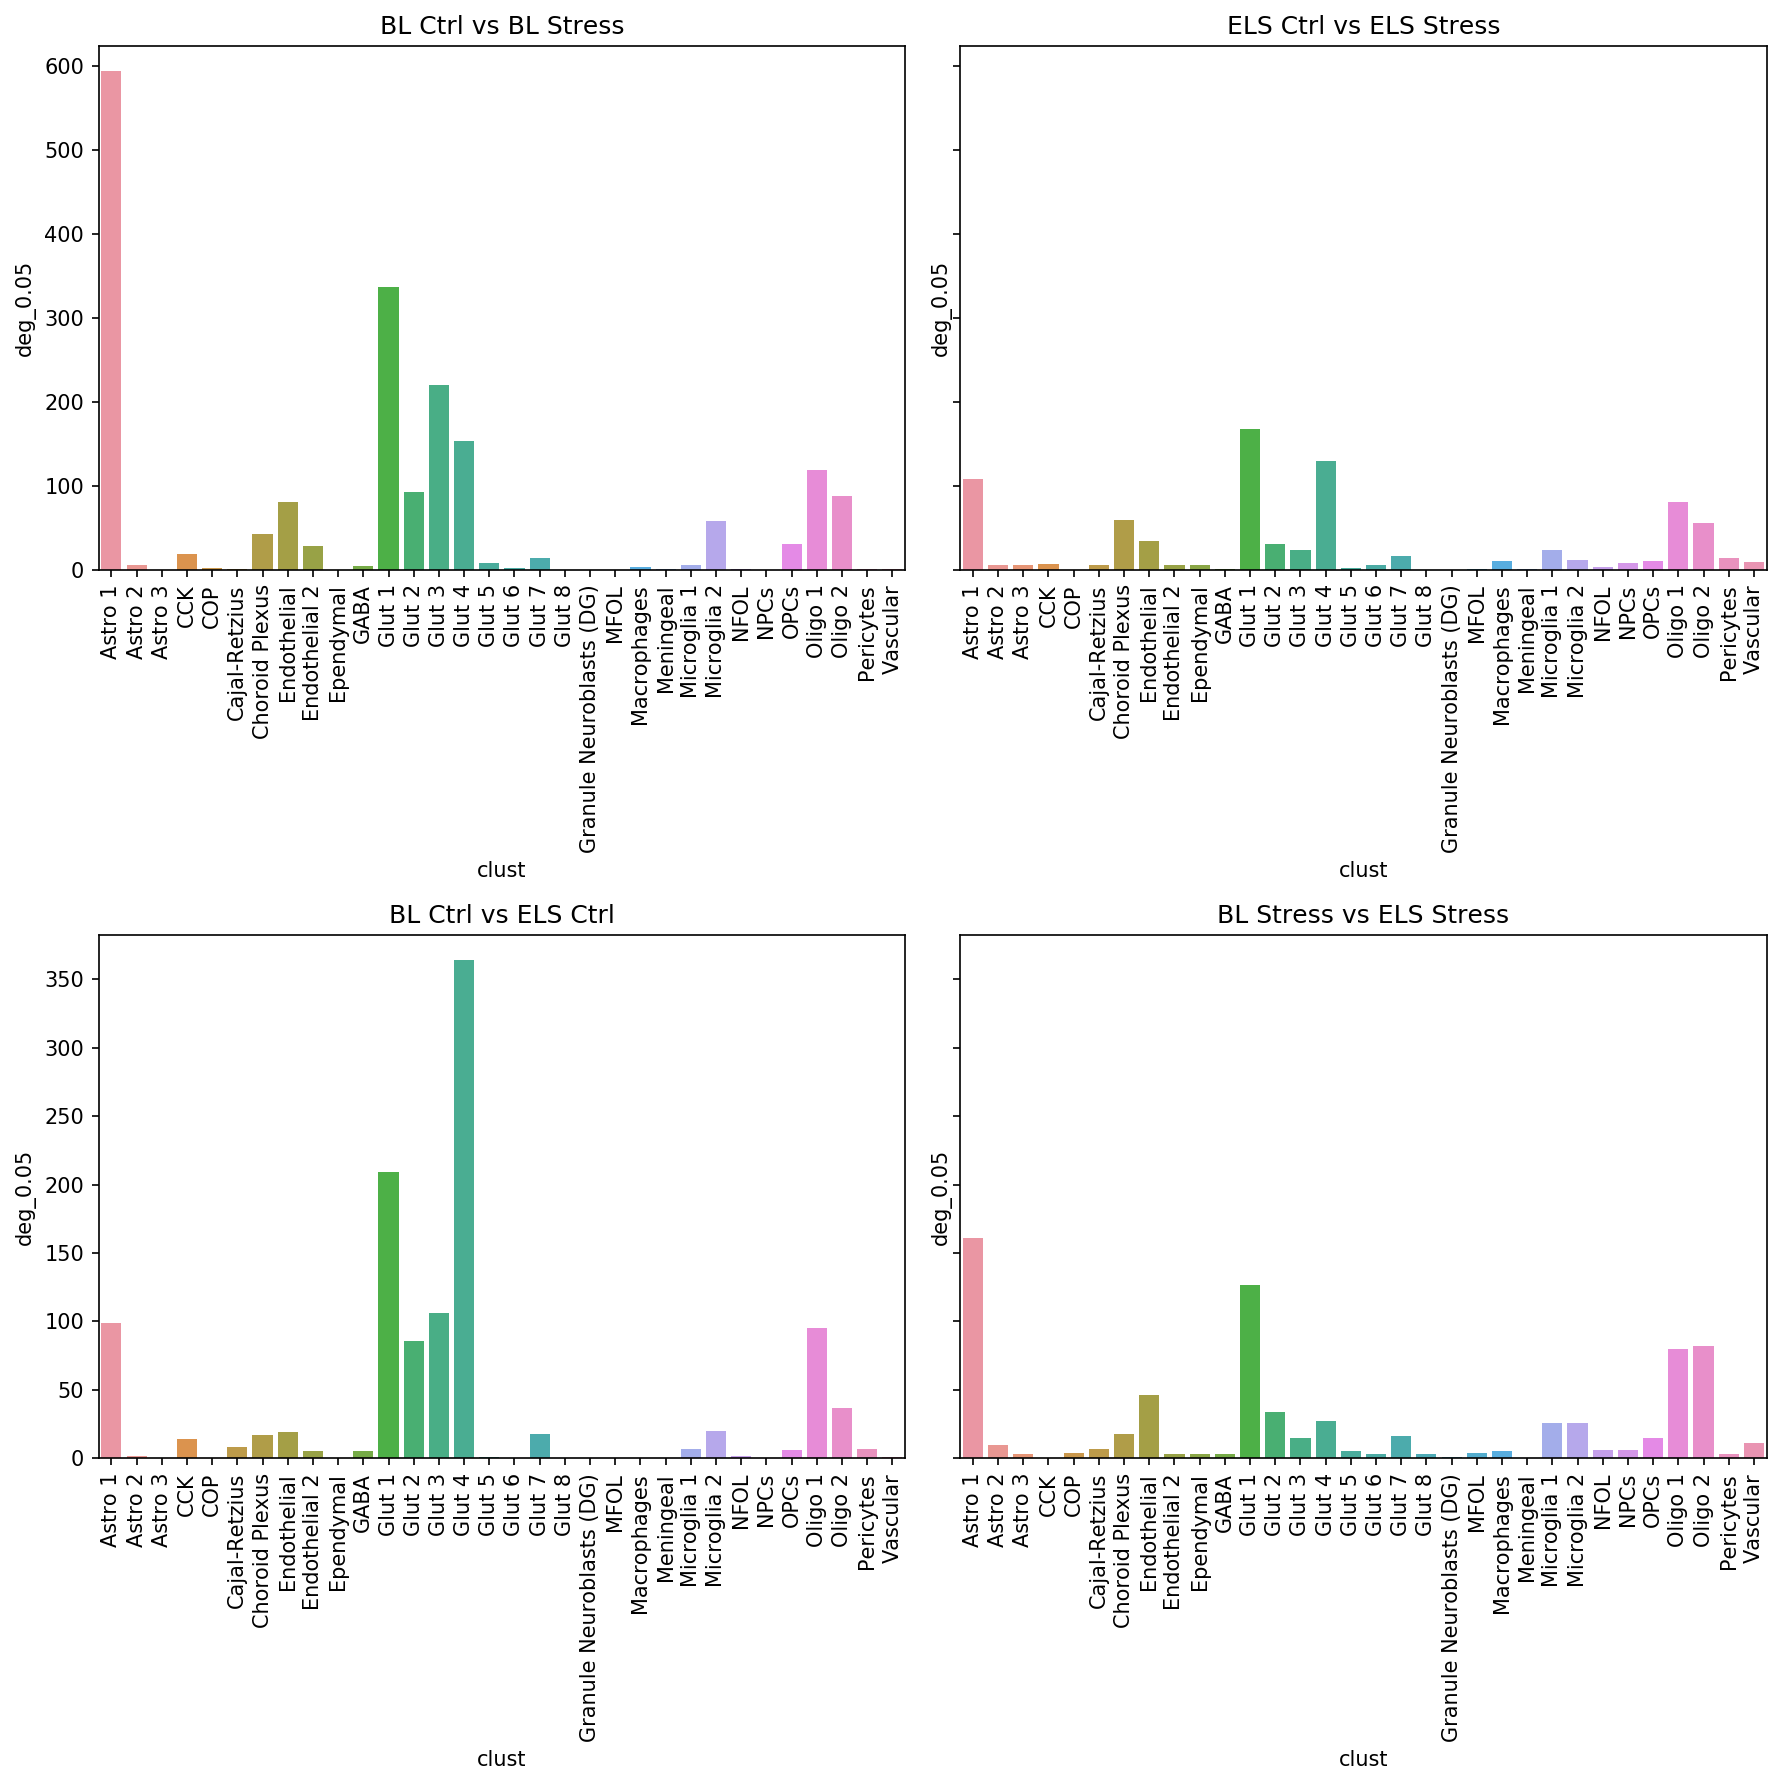

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey='row')

sns.barplot(x=df_baseline.groupby('clust').sum().index, y=df_baseline.groupby('clust').sum()['deg_0.05'], ax=ax[0, 0])
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=90)
ax[0, 0].set_title('BL Ctrl vs BL Stress')

sns.barplot(x=df_els.groupby('clust').sum().index, y=df_els.groupby('clust').sum()['deg_0.05'], ax=ax[0, 1])
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=90)
ax[0, 1].set_title('ELS Ctrl vs ELS Stress')

sns.barplot(x=df_ctrl.groupby('clust').sum().index, y=df_ctrl.groupby('clust').sum()['deg_0.05'], ax=ax[1, 0])
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=90)
ax[1, 0].set_title('BL Ctrl vs ELS Ctrl')

sns.barplot(x=df_stress.groupby('clust').sum().index, y=df_stress.groupby('clust').sum()['deg_0.05'], ax=ax[1, 1])
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90)
ax[1, 1].set_title('BL Stress vs ELS Stress')
fig.tight_layout()
#fig.savefig('../figures/DE_' + pairtest.replace(' ', '_') + '.png', dpi=200)